In [81]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from util import open_pckl_file, load_dir
import R2D2Features
from IPython.display import Image 
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

In [27]:
R2D2 = open_pckl_file('../datasets/0.1k/r2d2_objs/clean.pckl')

In [59]:
# path(iid)
def path(iid):
    return R2D2.get_path_to_image(None, str(iid))

In [60]:
# show_path(path) show_im(im)
def show(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
def show_im(im):
    imgplot = plt.imshow(im)
    plt.show()

In [54]:
# For an image, let's show all of the points on that image... then colored by how "good" each point is...
path = '/pless_nfs/home/mdt_/tcam/better_datasets_cause_we_are_dumb/better_dataset.pckl'
df = pd.read_pickle(path)

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,distance_same,distance_diff,hid,iid,xys,xys_same,xys_diff,closest_diff_hid,closest_same_iid,cloesest_diff_iid
0,-0.000106,-0.021163,0.059288,0.005788,0.008184,0.002877,-0.060456,-0.007827,-0.094985,0.076537,...,0.796833,0.830413,38889,6534183,"[289.2857, 183.5862, 38.054626]","[1912.7728271484375, 3128.3662109375, 181.0193...","[612.3599853515625, 2083.955078125, 362.038665...",18470,2669037,2669307
1,0.058812,-0.002676,0.084495,0.134348,-0.075134,0.051591,0.070851,-0.028425,-0.031099,0.018841,...,0.713464,0.756529,38889,6534183,"[84.0, 77.0, 32.0]","[531.95458984375, 3037.85302734375, 181.019332...","[195.1823272705078, 115.9779052734375, 45.2548...",141527,2669037,3965996
2,0.058090,0.010341,0.056122,-0.015700,-0.001026,-0.005374,-0.011505,-0.089430,0.063103,0.016339,...,0.640368,0.705479,38889,6534183,"[201.0, 29.999998, 32.0]","[787.37841796875, 3704.951904296875, 215.26948...","[3721.103515625, 678.6206665039062, 362.038665...",32032,2669035,2698623
3,-0.003880,0.032012,0.063779,-0.007348,-0.080657,-0.081751,-0.164018,0.021690,-0.038808,0.118558,...,0.706937,0.723436,38889,6534183,"[329.0, 156.0, 32.0]","[301.1904602050781, 81.05050659179688, 38.0546...","[778.0, 710.0, 64.0]",32032,6534180,3859115
4,-0.182362,-0.071197,-0.056407,0.004038,0.053724,-0.162972,0.079077,-0.101338,-0.034284,-0.162007,...,0.648600,0.696658,38889,6534183,"[209.0, 141.0, 32.0]","[208.6216278076172, 4471.49365234375, 215.2694...","[732.3343505859375, 970.4808349609375, 38.0546...",26959,2669037,3958293


In [69]:
iid = 6534183
hid = 38889

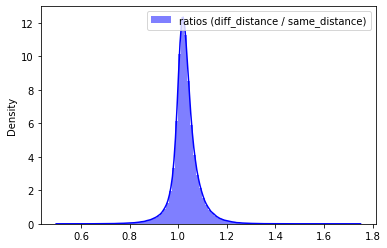

In [85]:
# Plot distance ratios
fig, ax = plt.subplots()
ratios = (df["distance_diff"].to_numpy() / df["distance_same"].to_numpy())
sns.histplot(ratios, label='ratios (diff_distance / same_distance)', bins=100, ax=ax, kde=True, stat="density", linewidth=0, color='blue')
plt.legend()
plt.show()

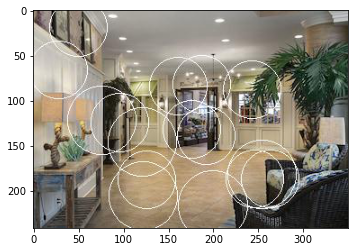

In [80]:
# Visualization of good/bad points on an image
with Image.open(path(iid)) as im:
    draw = ImageDraw.Draw(im)
for r in df[(df['iid'] == iid) & (df['hid'] == hid)].itertuples():
    ratio = r.distance_diff / r.distance_same
    if ratio < 1:
        continue
        color = (255, 0, 0)
    else:
        color = (0, 0, 255)
    rad = r.xys[2]#2 #.01 * (im)
    p = r.xys
    circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
    draw.ellipse(circle, fill=None)
name = "NEW_TEST.jpg"
im.save(name)
show(name)

In [118]:
# Now let's try to show, for some particular query point, three points in images side by side: query point, closest in same, closest in diff
# First, let's find the image with the best ratio
maxratio = 0
maxrow = None
for r in df.itertuples():
    ratio = r.distance_diff / r.distance_same
    if ratio > maxratio:
        maxratio = ratio
        maxrow = r

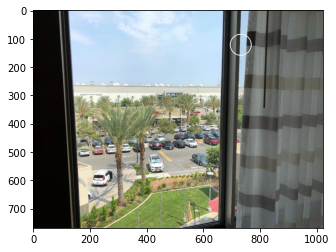

In [122]:
# Query point
with Image.open(path(maxrow.iid)) as im:
    draw = ImageDraw.Draw(im)
p = maxrow.xys
rad = maxrow.xys[2]
color = (0, 0, 255)
circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
draw.ellipse(circle, fill=None, width=3)
name = "TEST_MATCH_VIS1.jpg"
im.save(name)
show(name)

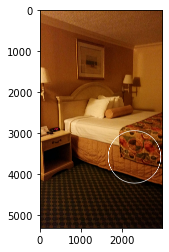

In [123]:
# Same hotel
with Image.open(path(maxrow.closest_same_iid)) as im:
    draw = ImageDraw.Draw(im)
p = maxrow.xys_same
rad = p[2]*3
color = (0, 0, 255)
circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
draw.ellipse(circle, fill=None, width=15)
name = "TEST_MATCH_VIS2.jpg"
im.save(name)
show(name)

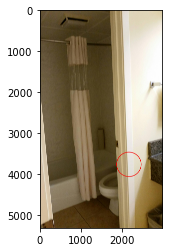

In [125]:
# Different hotel
with Image.open(path(maxrow.cloesest_diff_iid)) as im:
    draw = ImageDraw.Draw(im)
p = maxrow.xys_diff
rad = maxrow.xys_diff[2]
color = (0, 0, 255)
circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
draw.ellipse(circle, fill=None, outline=(255, 0, 0), width=15)
name = "TEST_MATCH_VIS3.jpg"
im.save(name)
show(name)

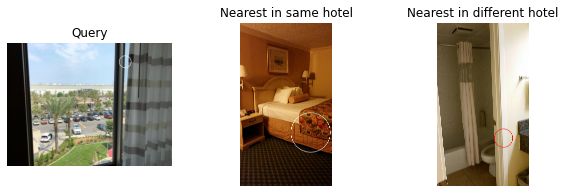

In [132]:
path1, path2, path3 = "TEST_MATCH_VIS1.jpg", "TEST_MATCH_VIS2.jpg", "TEST_MATCH_VIS3.jpg"
img1, img2, img3 = mpimg.imread(path1), mpimg.imread(path2), mpimg.imread(path3)
fig = plt.figure(figsize=(10,3))
rows, columns = 1, 3
fig.add_subplot(rows, columns, 1)
plt.imshow(img1)
plt.axis('off')
plt.title("Query")
fig.add_subplot(rows, columns, 2)
plt.imshow(img2)
plt.axis('off')
plt.title("Nearest in same hotel")
fig.add_subplot(rows, columns, 3)
plt.imshow(img3)
plt.axis('off')
plt.title("Nearest in different hotel")
plt.show()

In [224]:
def splash(row):
    # Query point
    with Image.open(path(row.iid)) as im1:
        draw = ImageDraw.Draw(im1)
        s, p = max(im1.size), row.xys
        rad = row.xys[2] + int(s*.01)
        circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
        draw.ellipse(circle, fill=None, width=int(s*.01))
    with Image.open(path(row.closest_same_iid)) as im2:
        draw = ImageDraw.Draw(im2)
        s, p = max(im2.size), row.xys
        rad = p[2] + int(s*.01)
        circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
        draw.ellipse(circle, fill=None, width=int(s*.01))
    with Image.open(path(row.cloesest_diff_iid)) as im3:
        draw = ImageDraw.Draw(im3)
        s, p = max(im3.size), row.xys
        rad = p[2] + int(s*.01)
        circle = ((p[0]-rad, p[1]-rad), (p[0]+rad, p[1]+rad))
        draw.ellipse(circle, fill=None, width=int(s*.01))
    fig = plt.figure(figsize=(10,3))
    rows, columns = 1, 3
    fig.add_subplot(rows, columns, 1)
    plt.imshow(im1)
    plt.axis('off')
    plt.title("Query ratio {}".format(round(row.distance_same / row.distance_diff,3)))
    fig.add_subplot(rows, columns, 2)
    plt.imshow(im2)
    plt.axis('off')
    plt.title("Same hotel {}".format(round(row.distance_same, 3)))
    fig.add_subplot(rows, columns, 3)
    plt.imshow(im3)
    plt.axis('off')
    plt.title("Diff hotel {}".format(round(row.distance_diff, 3)))
    plt.show()

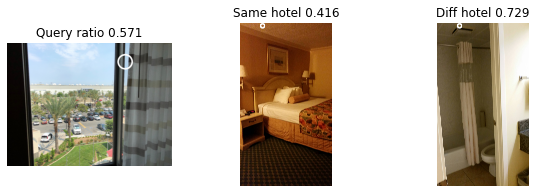

In [219]:
splash(maxrow)

In [210]:
df_sorted = df.sort_values(by='distance_same')
df_sorted.head()

,0,1,2,3,4,5,6,7,8,9,...,distance_same,distance_diff,hid,iid,xys,xys_same,xys_diff,closest_diff_hid,closest_same_iid,cloesest_diff_iid
360405,-0.146263,0.008854,-0.051115,0.015915,-0.070414,-0.124278,0.084545,-0.087521,0.085619,-0.103818,...,0.259853,0.403984,16785,3833128,"[23.777088, 441.23575, 38.054626]","[2442.891845703125, 4733.7314453125, 215.26948...","[300.7801818847656, 510.21600341796875, 38.054...",26959,2669034,3958290
204773,-0.009362,-0.077314,0.000489,0.130054,-0.086974,-0.052346,0.145747,-0.126687,0.144382,-0.013176,...,0.327793,0.476268,46600,3859117,"[442.0, 29.0, 32.0]","[123.0, 141.0, 32.0]","[128.0, 127.0, 32.0]",26959,6640294,5997377
360897,-0.092093,0.056160,0.052196,0.089972,-0.097193,-0.195036,-0.036210,0.234010,0.160292,0.069048,...,0.337427,0.529115,16785,3833128,"[68.95356, 513.78394, 38.054626]","[320.0, 37.0, 32.0]","[224.0, 736.0, 64.0]",141527,6640318,3965996
199987,-0.062219,-0.032826,-0.127420,0.117410,0.003385,0.055997,0.059827,0.017460,0.140812,0.004658,...,0.353844,0.466352,46600,3863139,"[386.0, 194.0, 32.0]","[386.5207824707031, 497.7077331542969, 53.8173...","[132.7058868408203, 209.3259735107422, 90.5096...",141527,3965996,3947168
298216,-0.003449,-0.143924,-0.110379,0.028965,-0.048946,-0.079830,0.161759,-0.280911,0.266950,-0.001868,...,0.354781,0.488999,26959,3958292,"[418.0, 94.0, 32.0]","[285.0, 128.0, 32.0]","[1608.0, 3472.000244140625, 256.0]",18470,6640316,3910623


In [217]:
df_sorteder = df.loc[(df.distance_same/df.distance_diff).sort_values().index]
df_sorteder.head()

,0,1,2,3,4,5,6,7,8,9,...,distance_same,distance_diff,hid,iid,xys,xys_same,xys_diff,closest_diff_hid,closest_same_iid,cloesest_diff_iid
296619,-0.137937,-0.148573,0.069619,0.112151,-0.066016,-0.055138,0.164436,-0.115781,0.003148,0.034755,...,0.416246,0.728522,26959,3958292,"[733.8072, 122.45201, 38.054626]","[2294.837890625, 3577.195068359375, 215.269485...","[2160.11474609375, 3760.28662109375, 304.43701...",38889,2669035,2669034
299230,-0.164316,-0.233660,-0.037597,0.159063,-0.112943,-0.000872,0.042548,-0.246649,0.120620,-0.085031,...,0.415036,0.720351,26959,3958292,"[733.0, 133.0, 32.0]","[1486.0107421875, 4336.0, 512.0]","[2173.70263671875, 4370.6328125, 215.269485473...",38889,2669034,2669034
251083,0.271124,-0.211061,-0.150642,0.070250,-0.101771,0.018443,0.152154,0.200465,0.215649,-0.078226,...,0.453958,0.756688,32032,3987772,"[71.0, 216.0, 32.0]","[915.2432861328125, 3819.2607421875, 430.53897...","[504.4335021972656, 230.23194885253906, 53.817...",46600,2669035,3863139
298243,-0.074743,-0.191341,-0.127632,-0.021208,-0.072580,-0.018988,0.178217,-0.127008,0.030925,0.020164,...,0.460668,0.762426,26959,3958292,"[732.61786, 156.92879, 38.054626]","[1641.1363525390625, 2441.259521484375, 362.03...","[776.0, 228.0, 128.0]",32032,2669034,3905572
248233,0.232498,-0.184240,-0.092296,-0.029158,-0.015161,0.036808,0.118323,0.252869,0.229221,-0.059964,...,0.445043,0.734490,32032,3987772,"[71.0, 214.0, 32.0]","[323.368408203125, 354.004638671875, 76.109252...","[504.4335021972656, 230.23194885253906, 53.817...",46600,3965996,3863139


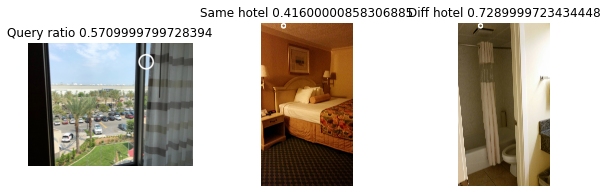

In [231]:
splash(df.iloc[296619])

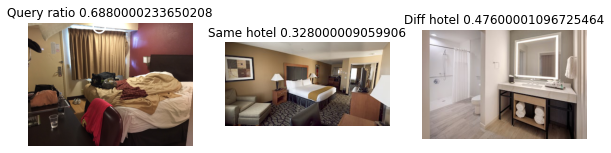

In [222]:
splash(df_sorted.iloc[1])

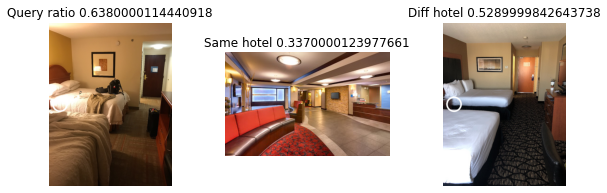

In [226]:
splash(df_sorted.iloc[2])

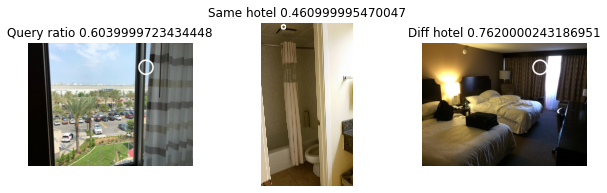

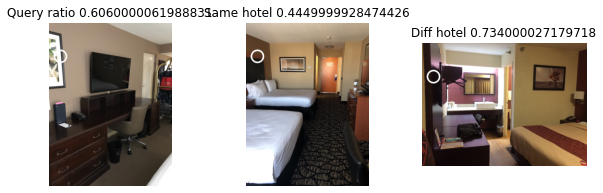

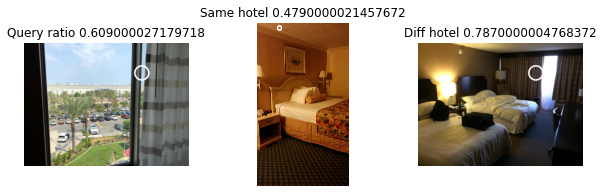

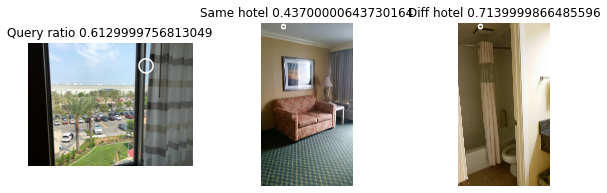

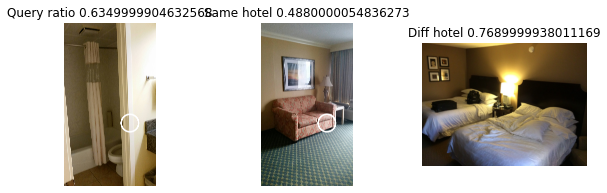

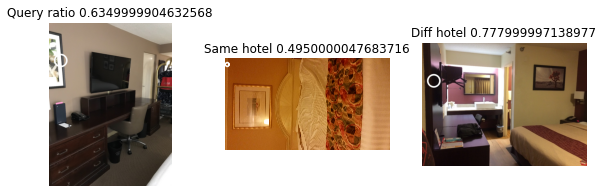

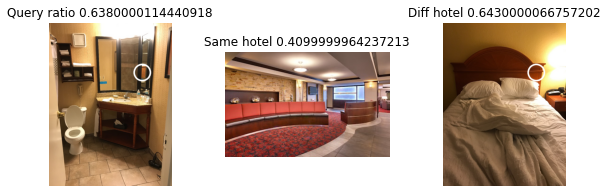

In [228]:
for i in range(3,10):
    splash(df_sorteder.iloc[i])

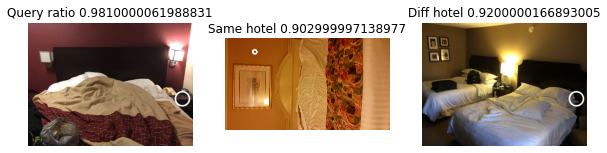

In [229]:
splash(df_sorted.iloc[-20043])